# Results

- RandomForestClassifier = 84.0%

In [ ]:
# IMport libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (15, 7)

# The Dataset

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

This notebook was made in reference with: https://www.kaggle.com/kenjee/titanic-project-example

In [ ]:
# Load in the datasets
df = pd.read_csv('/content/drive/MyDrive/Datasets/Titanic/train.csv')

In [ ]:
# Check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Check for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Conclusion for preliminary analysis

1. Dataset contains 891 observations and 12 features (11 features and 1 target)
2. Target variable is named 'Survived'
3. 177 observations for passenger age is missing
4. 687 cabin numbers are missing

To do:

1. FInd a way to impute the missing data

## Explore numerical data

In [ ]:
# Look at numeric and categorical values separately 
df_num = df[['Age','SibSp','Parch','Fare']]
df_cat = df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

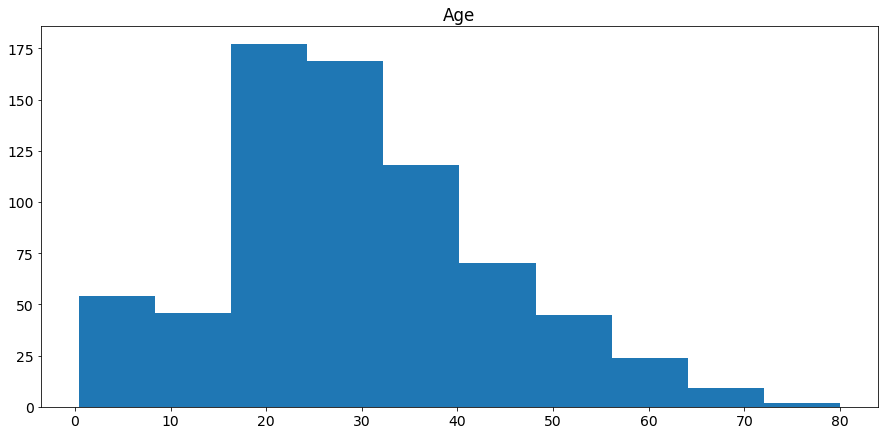

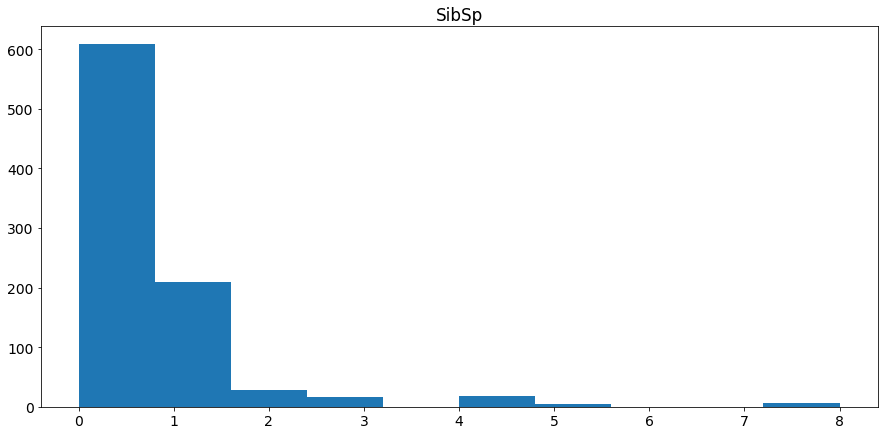

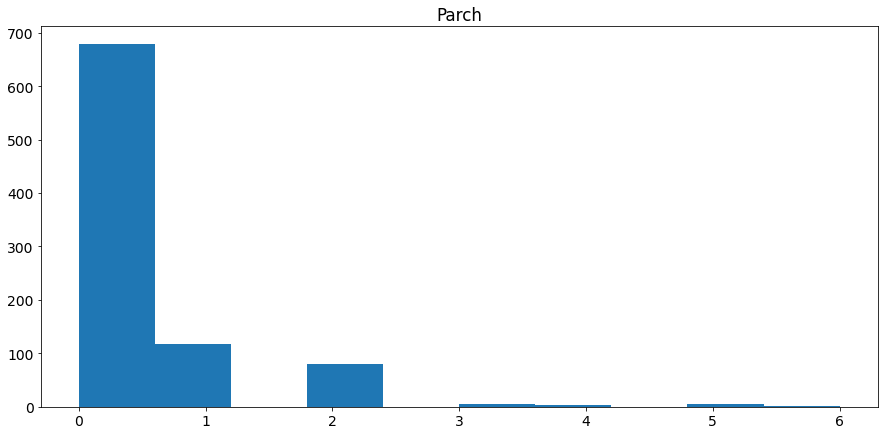

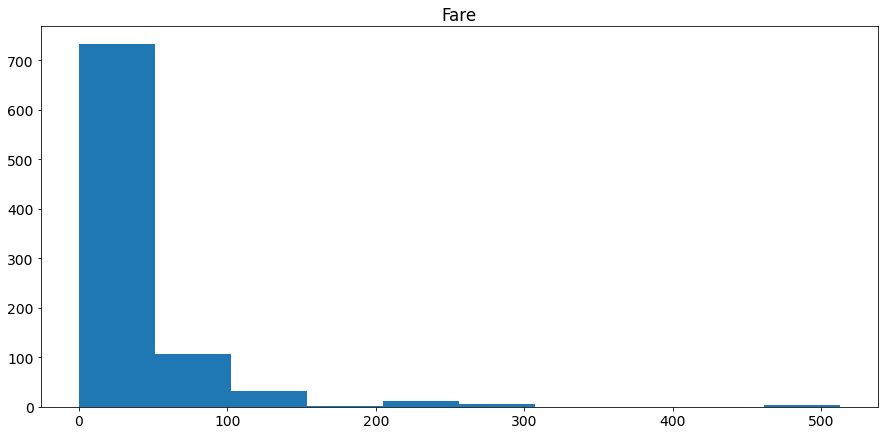

In [ ]:
# Distributions for all numeric variables 
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


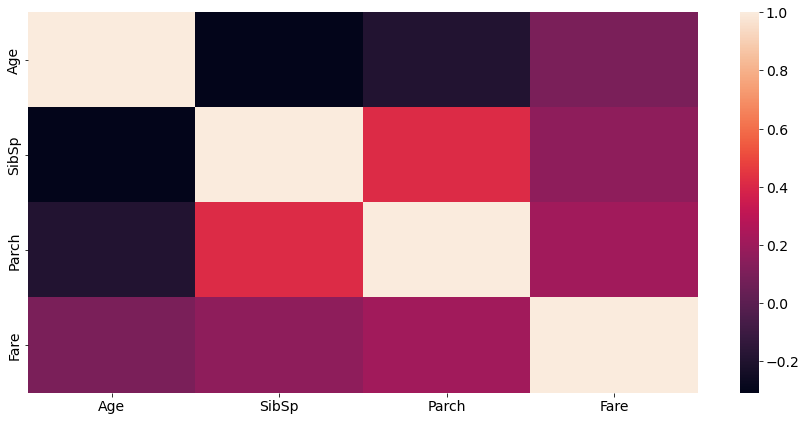

In [ ]:
print(df_num.corr())
sns.heatmap(df_num.corr())

We can see:

- Parch and SibSp are positvely correlated to one another
- Conjecture that families tend to travel together

## Explore categorical data

In [ ]:
# Compare survival rate across Age, SibSp, Parch, and Fare 
pd.pivot_table(df, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


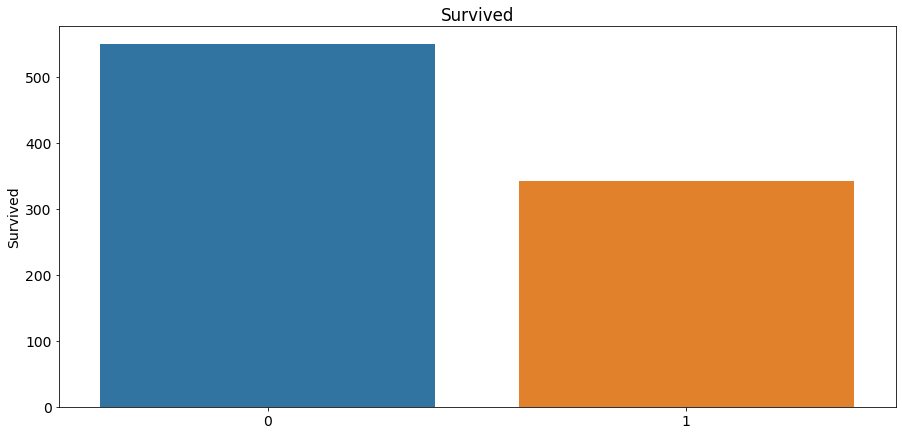

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


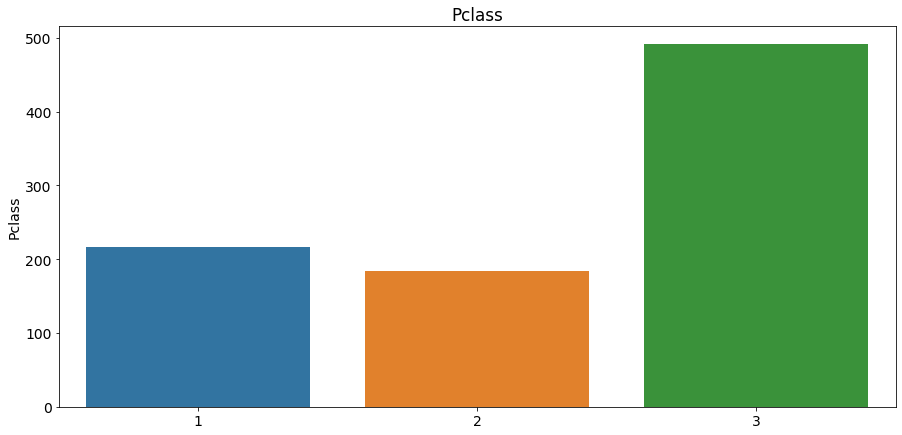

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


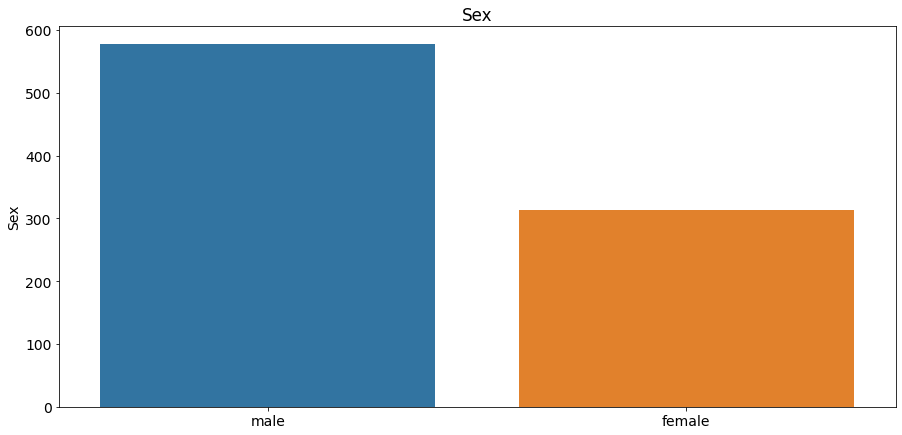

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


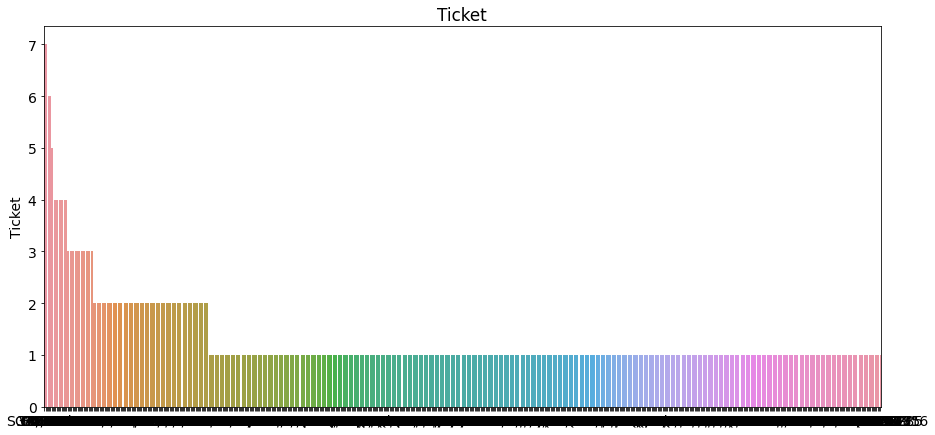

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


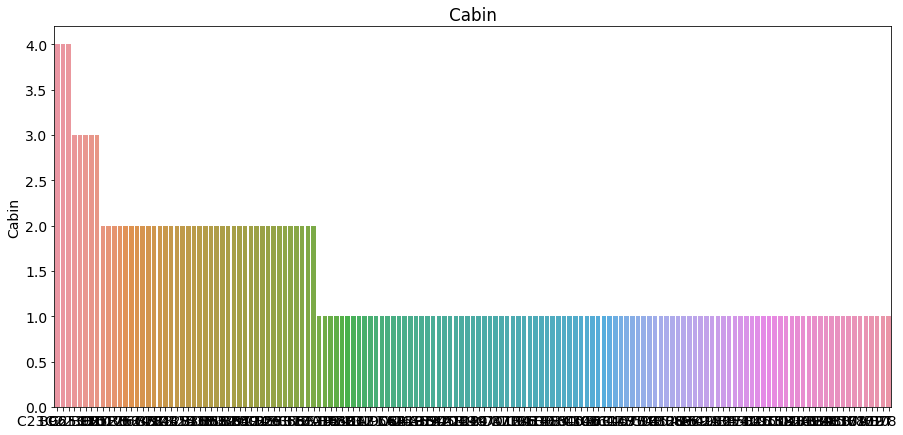

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


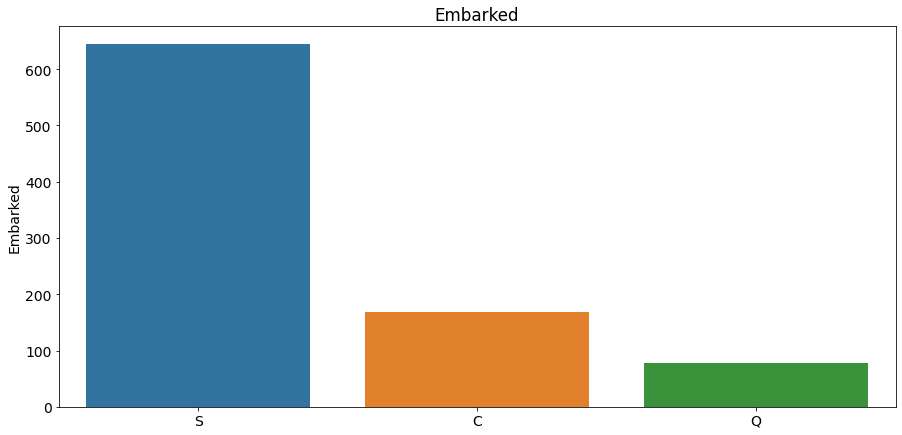

In [ ]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()\

In [ ]:
# Comparing survival and each of these categorical variables 
print(pd.pivot_table(df, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


Pclass:

- More in class 1 are saved compared to class 3
- Conjecture that wealthy passengers are saved

Sex:

- More women are saved over men
- Conjecture that the 'Women and Children'

Embarked:

- More who embarked from S did not survive compared to C

# Deal with NA values

## Deal with missing value from 'Age'

In [ ]:
# Split the 'Name' column to get the Last Name and Title and First Name
df[['LastName', 'Title and First Name']] = df['Name'].str.split(',', expand=True)

# Split the 'Title and First Name' column to get the Title and First Name
df[['Title', 'First Name', 'NA']] = df['Title and First Name'].str.split('.', expand=True)

# Strip leading space
df['Title'] = df['Title'].str.lstrip()

# Count the unique values from the resulting dataframe
df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
the Countess      1
Ms                1
Mme               1
Jonkheer          1
Don               1
Sir               1
Capt              1
Lady              1
Name: Title, dtype: int64

In [ ]:
# Create null age dataframes
null_age_df = df[df['Age'].isnull()]

In [ ]:
# Get value counts of each null age passenger
null_age_df['Title'].value_counts()

Mr        119
Miss       36
Mrs        17
Master      4
Dr          1
Name: Title, dtype: int64

### Unique value counts for 'Age'

We see now that we can separate 'Mr', 'Miss and Mrs', 'Master' and 'Dr' and find the median age for each group to be used for extrapolation.

### Get median age for 'Mr'

In [ ]:
# Create group by 'Title'
title = df.groupby(['Title'])

In [ ]:
# Create a mr group
mr_group = title.get_group('Mr')

In [ ]:
# Drop null values from mr_group
no_na_mr_group = mr_group[mr_group['Age'].notna()]

In [ ]:
# Get mr_group median
mr_median_age = no_na_mr_group['Age'].median()

mr_median_age

30.0

### Get median age for 'Mrs and Miss'


In [ ]:
# Create a mrs_group
mrs_group = title.get_group('Mrs')

# Create a miss_group
miss_group = title.get_group('Miss')

In [ ]:
# Drop null values from mrs_group
no_na_mrs_group = mrs_group[mrs_group['Age'].notna()]

# Drop null values from mrs_group
no_na_miss_group = miss_group[miss_group['Age'].notna()]

In [ ]:
# # Get mrs median
mrs_median_age = no_na_mrs_group['Age'].median()

mrs_median_age

35.0

In [ ]:
# Get miss median
miss_median_age = no_na_miss_group['Age'].median()

miss_median_age

21.0

### Get median age for 'Master'

In [ ]:
# Create a master_group
master_group = title.get_group('Master')

In [ ]:
# Drop null values from master_group
no_na_master_group = master_group[master_group['Age'].notna()]

In [ ]:
# Get master median
master_median_age = no_na_master_group['Age'].median()

master_median_age

3.5

### Get median age for 'Dr'

In [ ]:
# Create a dr group
dr_group = title.get_group('Dr')

In [ ]:
# Drop null values from dr_group
no_na_dr_group = dr_group[dr_group['Age'].notna()]

In [ ]:
# Get dr_group median
dr_median_age = no_na_dr_group['Age'].median()

dr_median_age

46.5

### Fill in missing data for 'Age'

In [ ]:
df[df['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title and First Name,Title,First Name,NA
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Moran,Mr. James,Mr,James,None
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Williams,Mr. Charles Eugene,Mr,Charles Eugene,None
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Masselmani,Mrs. Fatima,Mrs,Fatima,None
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Emir,Mr. Farred Chehab,Mr,Farred Chehab,None
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,O'Dwyer,"Miss. Ellen ""Nellie""",Miss,"Ellen ""Nellie""",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,Razi,Mr. Raihed,Mr,Raihed,None
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,Sage,"Miss. Dorothy Edith ""Dolly""",Miss,"Dorothy Edith ""Dolly""",None
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,van Melkebeke,Mr. Philemon,Mr,Philemon,None
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,Laleff,Mr. Kristo,Mr,Kristo,None


In [ ]:
# Condition for mr_group
cond_mr = df['Title'] == 'Mr'
# Condition for miss_group
cond_miss = df['Title'] == 'Miss'
# Condition for mrs_group
cond_mrs = df['Title'] == 'Mrs'
# Condition for master_group
cond_master = df['Title'] == 'Master'
# Condition for dr_group
cond_dr = df['Title'] == 'Dr'

# Fill NA with above 5 conditions 
df['Age'] = df['Age'].fillna(cond_mr.map({True:mr_median_age, False: np.nan}))
df['Age'] = df['Age'].fillna(cond_miss.map({True:miss_median_age, False: np.nan}))
df['Age'] = df['Age'].fillna(cond_mrs.map({True:mrs_median_age, False: np.nan}))
df['Age'] = df['Age'].fillna(cond_master.map({True:master_median_age, False: np.nan}))
df['Age'] = df['Age'].fillna(cond_dr.map({True:dr_median_age, False: np.nan}))

In [ ]:
# Check if any more nulls in 'Age' column
df['Age'].isnull().sum()

0

## Deal with missing value from 'Cabin'

In [ ]:
percent_missing = df['Cabin'].isnull().sum()/ df['Cabin'].size

In [ ]:
percent_missing

0.7710437710437711

Since the percentage missing is a high number, we will delete as there is no way I could find to impute the data

In [ ]:
df = df.drop(['Cabin', 'LastName', 'Title and First Name', 'First Name', 'NA'], axis=1)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,W./C. 6607,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr


# Data Vizualizations

### Does 'PClass'(Ticket Class) matter in survivability e.g. Do higher paying customers get saved

In [ ]:
# Create group by 'Pclass'
class1 = df.groupby(['Pclass'])

group1 = class1.get_group(1.0)
group1_value_counts = group1['Survived'].value_counts()

group2 = class1.get_group(2.0)
group2_value_counts = group2['Survived'].value_counts()

group3 = class1.get_group(3.0)
group3_value_counts = group3['Survived'].value_counts()

In [ ]:
# Create list of survivors and non-survivors
survived = []
no_survived = []

survived.append(group1_value_counts[1])
survived.append(group2_value_counts[1])
survived.append(group3_value_counts[1])

no_survived.append(group1_value_counts[0])
no_survived.append(group2_value_counts[0])
no_survived.append(group3_value_counts[0])

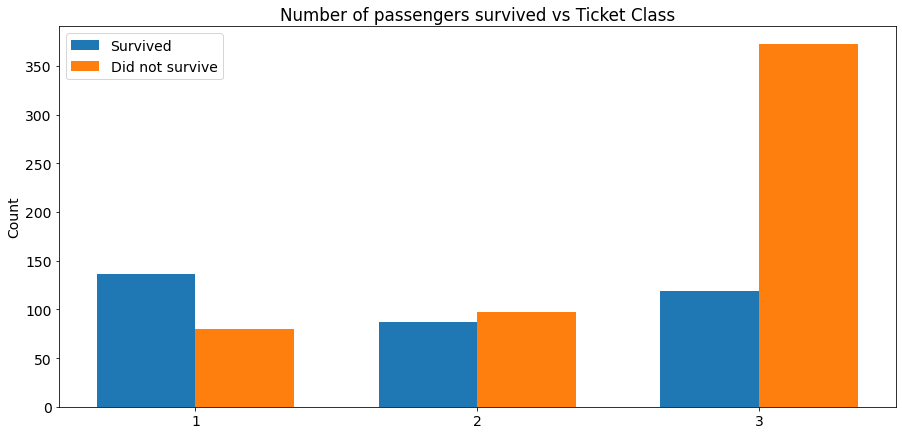

In [ ]:
labels = [1, 2, 3]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, survived, width, label='Survived')
rects1 = ax.bar(x + width/2, no_survived, width, label='Did not survive')

ax.set_ylabel('Count')
ax.set_title('Number of passengers survived vs Ticket Class')

ax.set_xticks(x) # values
ax.set_xticklabels(labels) # labels
ax.legend()

plt.show();

We see that the majority of better paying customer get saved while the majority of does who did not suvived are from the third class.

### Does 'Sex' matter? 

In [ ]:
# Create group by 'Title'
sex_group = df.groupby(['Sex'])

# Create a mr group
male = sex_group.get_group('male')
male_value_counts = male['Survived'].value_counts()

female = sex_group.get_group('female')
female_value_counts = female['Survived'].value_counts()

In [ ]:
survived = []
no_survived = []

survived.append(male_value_counts[1])
survived.append(female_value_counts[1])

no_survived.append(male_value_counts[0])
no_survived.append(female_value_counts[0])

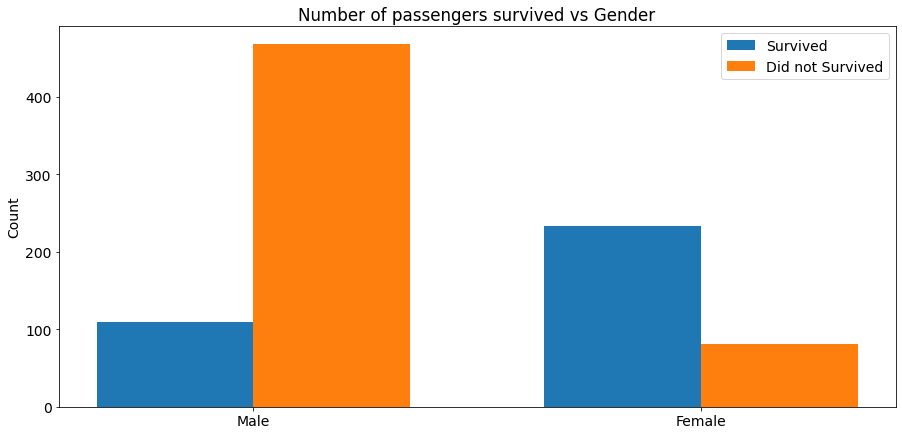

In [ ]:
labels = ['Male', 'Female']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, survived, width, label='Survived')
rects1 = ax.bar(x + width/2, no_survived, width, label='Did not Survived')

ax.set_ylabel('Count')
ax.set_title('Number of passengers survived vs Gender')

ax.set_xticks(x) # values
ax.set_xticklabels(labels) # labels
ax.legend()

plt.show();

We see the majority of saved are women as compared to males.

### Does 'Age' matter?

(array([ 58.,  46., 213., 288., 135.,  71.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

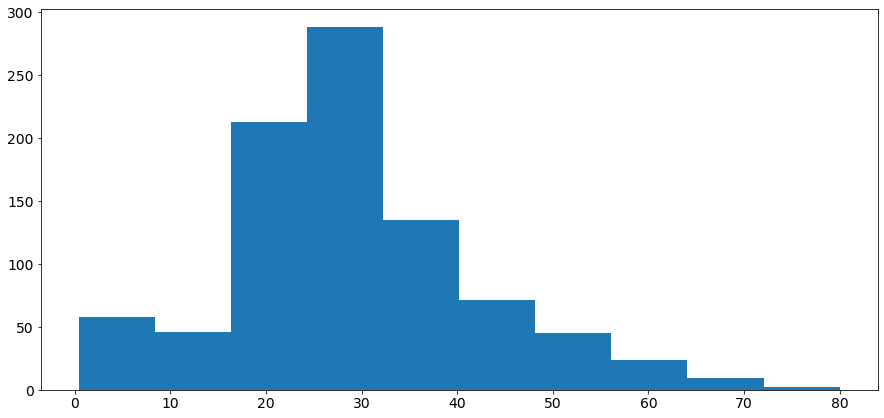

In [ ]:
plt.hist(df['Age'])

In [ ]:
df['Age_Group'] = pd.cut(df['Age'],
                                   bins = [0, 15, 30, 45, 80], labels = ['0-15', '15-30', '30-45', '>45'])

In [ ]:
unique_values = df['Age_Group'].unique()
unique_target = df['Survived'].unique()

unique_target_len = len(df['Survived'].unique())


# title_0 or title_1
dict_ = {}

for i in range(len(unique_values)):
  for j in range(unique_target_len):
    dict_[unique_values[i] + "_" + str(unique_target[j])] = 0

In [ ]:
for index, row in df.iterrows():
  age_group = row['Age_Group']
  survived = row['Survived']

  key_name = age_group + '_' + str(survived)

  dict_[key_name] = dict_[key_name] + 1

In [ ]:
x = list(dict_.keys())

In [ ]:
x_len = len(x)

In [ ]:
no_survived = []
survived = []

for i in range(x_len):
  if (i % 2 == 0):
    no_survived.append(dict_[x[i]])
  else:
    survived.append(dict_[x[i]])


In [ ]:
labels = []

for i in range(len(x)):
  if(i % 2 == 0):
    temp_label = x[i].split('_')
    labels.append(temp_label[0])

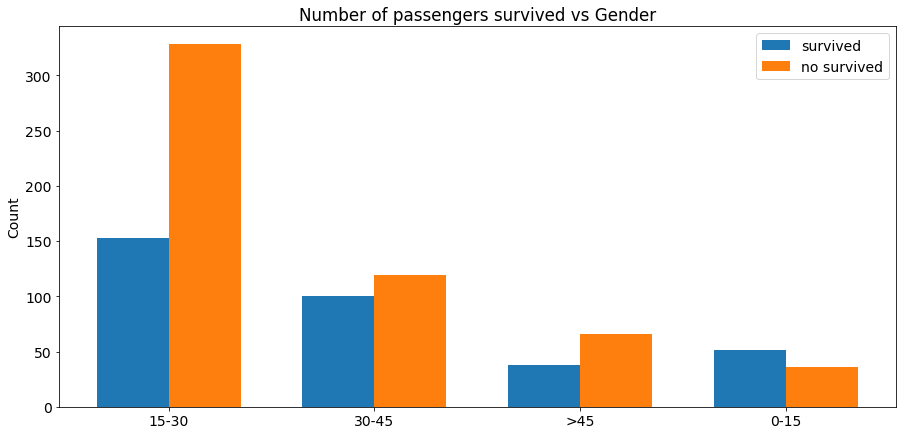

In [ ]:
x = np.arange(len(labels)) 
width = 0.35

# labels = ['Male', 'Female']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, survived, width, label='survived')
rects1 = ax.bar(x + width/2, no_survived, width, label='no survived')

ax.set_ylabel('Count')
ax.set_title('Number of passengers survived vs Gender')

ax.set_xticks(x) # values
ax.set_xticklabels(labels) # labels
ax.legend()

plt.show();

Older and youngest age groups were saved while younger people did not get saved

### Do families or singles gets saved?

In [ ]:
def f(row):
    if (row['Parch'] == 0) & (row['SibSp'] == 0):
        val = 'Single'
    elif (row['Parch'] != 0) | (row['SibSp'] != 0):
        val = 'Family'
    return val

In [ ]:
df['Family_Status'] = df.apply(f, axis=1)

In [ ]:
unique_values = df['Family_Status'].unique()
unique_target = df['Survived'].unique()

unique_target_len = len(df['Survived'].unique())


# title_0 or title_1
dict_ = {}

for i in range(len(unique_values)):
  for j in range(unique_target_len):
    dict_[unique_values[i] + "_" + str(unique_target[j])] = 0

In [ ]:
for index, row in df.iterrows():
  family_status = row['Family_Status']
  survived = row['Survived']

  key_name = family_status + '_' + str(survived)

  dict_[key_name] = dict_[key_name] + 1

In [ ]:
x = list(dict_.keys())

In [ ]:
x_len = len(x)

In [ ]:
no_survived = []
survived = []

for i in range(x_len):
  if (i % 2 == 0):
    no_survived.append(dict_[x[i]])
  else:
    survived.append(dict_[x[i]])

In [ ]:
labels = []

for i in range(len(x)):
  if(i % 2 == 0):
    temp_label = x[i].split('_')
    labels.append(temp_label[0])

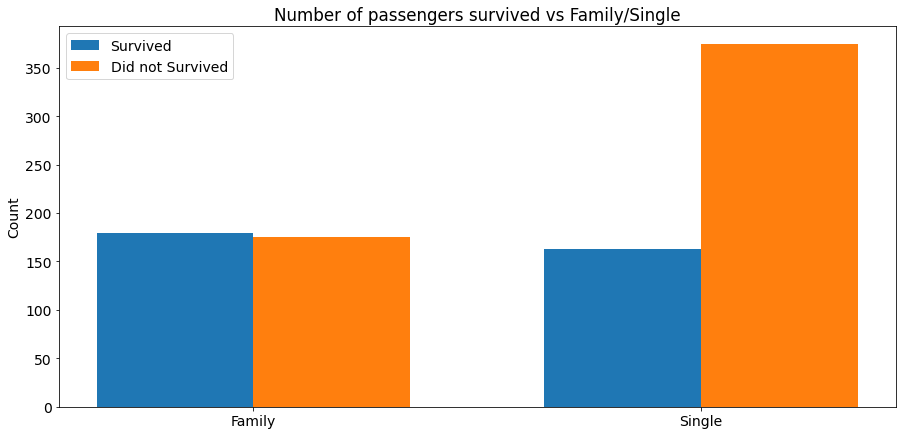

In [ ]:
x = np.arange(len(labels)) 
width = 0.35

# labels = ['Male', 'Female']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, survived, width, label='Survived')
rects1 = ax.bar(x + width/2, no_survived, width, label='Did not Survived')

ax.set_ylabel('Count')
ax.set_title('Number of passengers survived vs Family/Single')

ax.set_xticks(x) # values
ax.set_xticklabels(labels) # labels
ax.legend()

plt.show();

Singles were less likely to get saved

### Does the title of someone matters? e.g. do Dr., Sirs, Cols, Countesses get saved

In [ ]:
# Get unique values from column that we want to plot agaisnt target variables
unique_values = df['Title'].unique()
# Get unique values from the target variable
unique_target = df['Survived'].unique()
# Get length of the target variables
unique_target_len = len(df['Survived'].unique())

# A dictionary to hold each column data by target variable
dict_ = {}

In [ ]:
# Fill the dictionary
for i in range(len(unique_values)):
  for j in range(unique_target_len):
    key_name = unique_values[i] + "_" + str(j)
    dict_[key_name] = 0

In [ ]:
# Get 
for index, row in df.iterrows():
  family_status = row['Title']
  survived = row['Survived']

  key_name = family_status + '_' + str(survived)

  dict_[key_name] = dict_[key_name] + 1

In [ ]:
# Create lists for plotting
no_survived = []
survived = []

x = list(dict_.keys())
x_len = len(x)

for i in range(x_len):
  if (i % 2 == 0):
    no_survived.append(dict_[x[i]])
  else:
    survived.append(dict_[x[i]])

In [ ]:
# Get labels
labels = []

for i in range(len(x)):
  if(i % 2 == 0):
    temp_label = x[i].split('_')
    labels.append(temp_label[0])

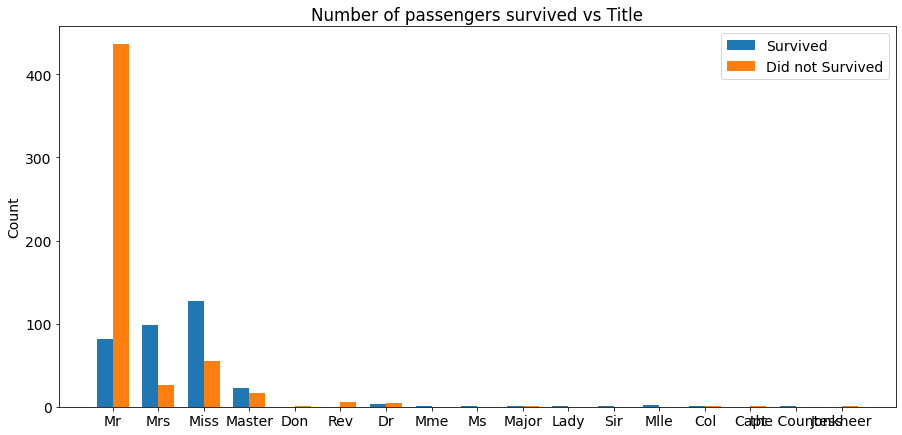

In [ ]:
# Create the plot
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, survived, width, label='Survived')
rects1 = ax.bar(x + width/2, no_survived, width, label='Did not Survived')

ax.set_ylabel('Count')
ax.set_title('Number of passengers survived vs Title')

ax.set_xticks(x) # values
ax.set_xticklabels(labels) # labels
ax.legend()

plt.show();

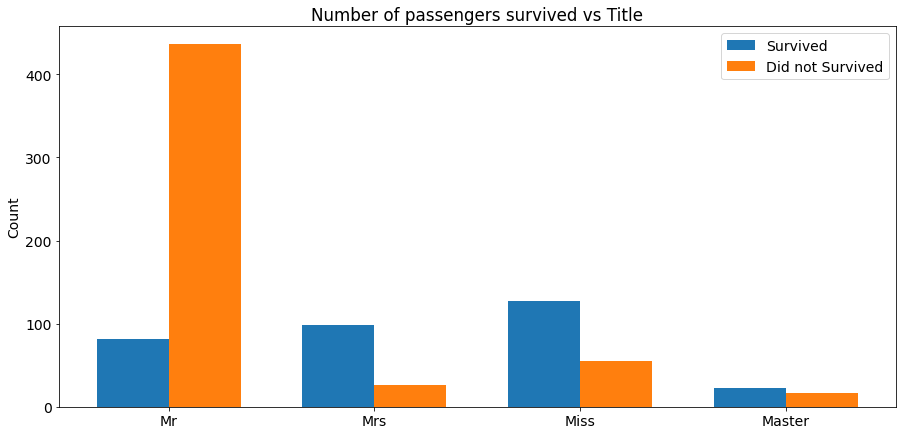

In [ ]:
# Splitting the lists to see the graph better
# First 4
first_4_labels = labels[:4]
first_4_survived = survived[:4]
first_4_no_survived = no_survived[:4]

# Create the plot
x = np.arange(len(first_4_labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, first_4_survived, width, label='Survived')
rects1 = ax.bar(x + width/2, first_4_no_survived, width, label='Did not Survived')

ax.set_ylabel('Count')
ax.set_title('Number of passengers survived vs Title')

ax.set_xticks(x) # values
ax.set_xticklabels(first_4_labels) # labels
ax.legend()

plt.show();

We see the the age-long saying 'Women and Children First' holds true where by more women and children were saved whereas the biggest disparity is between Men who were not saved.

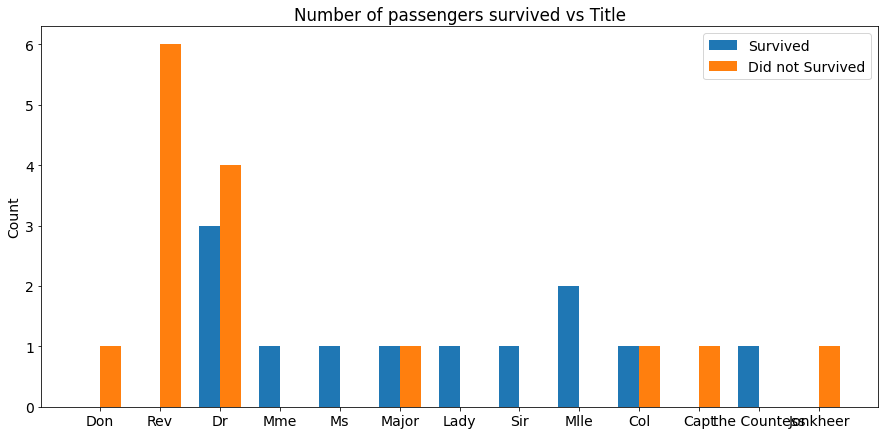

In [ ]:
plt.rcParams['figure.figsize'] = (15, 7)
# Rest of all
rest_labels = labels[4:]
rest_survived = survived[4:]
rest_no_survived = no_survived[4:]

# Create the plot
x = np.arange(len(rest_labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rest_survived, width, label='Survived')
rects1 = ax.bar(x + width/2, rest_no_survived, width, label='Did not Survived')

ax.set_ylabel('Count')
ax.set_title('Number of passengers survived vs Title')

ax.set_xticks(x) # values
ax.set_xticklabels(rest_labels) # labels
ax.legend()

plt.show();

Here we see that most blaringly, Reverends who are people of faith opted to give their spot on the lifeboats to someone else. Furthermore, people of royalty e.g. Sirs, Ladies and Countesses were saved and most famously, the Captain did went down with his ship.

# Preparing for Machine Learning

## Data preprocesing

In [ ]:
# Drop unnecessary columns
df = df.drop(['PassengerId','Name'], axis=1)

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_Group,Family_Status
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr,15-30,Family
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs,30-45,Family
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,15-30,Single
3,1,1,female,35.0,1,0,113803,53.1000,S,Mrs,30-45,Family
4,0,3,male,35.0,0,0,373450,8.0500,S,Mr,30-45,Single
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S,Rev,15-30,Single
887,1,1,female,19.0,0,0,112053,30.0000,S,Miss,15-30,Single
888,0,3,female,21.0,1,2,W./C. 6607,23.4500,S,Miss,15-30,Family
889,1,1,male,26.0,0,0,111369,30.0000,C,Mr,15-30,Single


In [ ]:
# Get the dummy variables 
pclass = pd.get_dummies(df.Pclass, drop_first=True, prefix='p')
sex = pd.get_dummies(df.Sex, drop_first=True)
ticket = pd.get_dummies(df.Ticket, drop_first=True)
embarked = pd.get_dummies(df.Embarked, drop_first=True)
title = pd.get_dummies(df.Title, drop_first=True)
age_group = pd.get_dummies(df.Age_Group, drop_first=True)
family_status = pd.get_dummies(df.Family_Status, drop_first=True)

# Drop un-encoded features
df.drop(['Pclass','Sex','Ticket','Embarked', 'Title', 'Age_Group', 'Family_Status'], axis = 1, inplace = True)

# Add the results to the original df
df = pd.concat([pclass,sex,ticket,embarked, title, age_group, family_status, df], axis=1)

df.head()

,p_2,p_3,male,110413,110465,110564,110813,111240,111320,111361,111369,111426,111427,111428,112050,112052,112053,112058,112059,112277,112379,113028,113043,113050,113051,113055,113056,113059,113501,113503,113505,113509,113510,113514,113572,113760,113767,113773,113776,113781,...,STON/O2. 3101279,STON/O2. 3101282,STON/O2. 3101283,STON/O2. 3101290,SW/PP 751,W./C. 14258,W./C. 14263,W./C. 6607,W./C. 6608,W./C. 6609,W.E.P. 5734,W/C 14208,WE/P 5735,Q,S,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess,15-30,30-45,>45,Single,Survived,Age,SibSp,Parch,Fare
0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,22.0,1,0,7.2500
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,38.0,1,0,71.2833
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,26.0,0,0,7.9250
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,35.0,1,0,53.1000
4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,35.0,0,0,8.0500


In [119]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

y = df.pop('Survived')
X = df

In [122]:
# Split to training and test datasets at 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [125]:
# Build a Random Forest Model
clf = RandomForestClassifier()

In [126]:
# Fit the new subsets onto the model that we already built
clf.fit(X_train, y_train)

RandomForestClassifier()

In [127]:
# Predict on the test subset
print(clf.predict(X_test))

[0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0
 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0
 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1]


In [129]:
# Get te accuracy score of the classification
print(clf.score(X_test, y_test))

0.8379888268156425
